In [2]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [21]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-04-08 13:06:34--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.5’

insurance.csv.5     100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-04-08 13:06:34 (115 MB/s) - ‘insurance.csv.5’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [22]:
# One-hot encode categorical columns
dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'], prefix=['sex', 'smoker', 'region'])

# Ensure all data is float32 (commonly expected data type for TensorFlow operations)
dataset = dataset.astype('float32')

# Split the dataset into training and testing sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Separate features from labels
train_labels = train_dataset.pop('expenses').values
test_labels = test_dataset.pop('expenses').values

# Convert DataFrames to NumPy arrays (if not already in this format)
train_dataset = train_dataset.values
test_dataset = test_dataset.values

# Normalize the data
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(train_dataset)  # Ensure this is a NumPy array

# Continue with model definition, compilation, and training as before...


In [33]:
from tensorflow.keras import layers, models, regularizers

# Define the model with some regularization
model = models.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae', 'mse'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_dataset, train_labels,
                    epochs=100,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stopping, tfdocs.modeling.EpochDots()])



Epoch: 0, loss:12711.6426,  mae:12711.5605,  mse:301860992.0000,  val_loss:14426.0947,  val_mae:14426.0098,  val_mse:363248448.0000,  
....................................................................................................

9/9 - 0s - loss: 3489.4863 - mae: 3483.2844 - mse: 48094660.0000 - 40ms/epoch - 4ms/step
Testing set Mean Abs Error: 3483.28 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


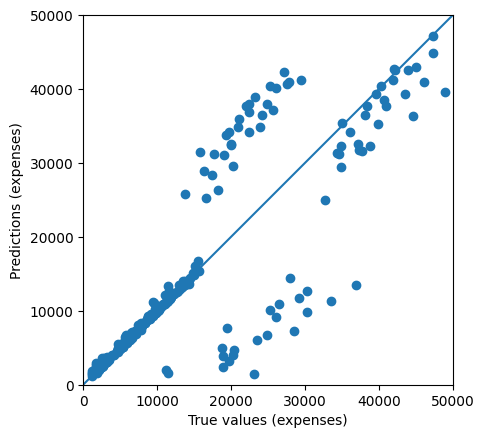

In [34]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
